In [2]:
import sys
# # sys.path.append('/global/cscratch1/sd/jianyao/ForSE/')
sys.path.append('/pscratch/sd/j/jianyao/forse_codes/') 
from forse.tools.nn_tools import *
from forse.tools.img_tools import *
from forse.tools.mix_tools import *
# # sys.path.append('/pscratch/sd/j/jianyao/ForSE')
import pymaster as nmt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from copy import copy
%matplotlib inline
import numpy as np

In [3]:
import seaborn as sns

sns.set_context("talk")
# sns.set()
sns.set_style("ticks")

import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

In [4]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

In [214]:
import after_training_3amin
from importlib import reload
reload(after_training_3amin)

from after_training_3amin import post_training

# load data for the input

In [18]:
dir_data = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/'
ss_I = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[0, 0:348]

NNout_Q = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NNout_Q_ss_only_3amin_Nico_20amin_from_5_6_revised.npy')
NNout_U = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NNout_U_ss_only_3amin_Nico_20amin_from_5_6_revised.npy')
Ls_Q20amin = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NNout_Q_physical_units_20amin_from_Nico_notebook_cori.npy')
Ls_U20amin = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NNout_U_physical_units_20amin_from_Nico_notebook_cori.npy')

In [19]:
gauss_ss_ps = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_3_over_20_power_spectra_lmax_3500.npy') #[2, 174, 49, 1, 25] Q, U
gauss_ss_mean_std = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_3_over_20_mean_and_std.npy') #[4, 174, 49] Q_mean, Q_std, U_mean, U_std

In [63]:
Gauss_Q_3amin.shape

(174, 1280, 1280)

# contruct the validation class

In [215]:
output = post_training(NNout_Q, NNout_U, ss_I, Ls_Q20amin, Ls_U20amin, MF = True)

In [143]:
output.normalization(gauss_ss_ps, gauss_ss_mean_std, mask_path = 'mask_320*320.npy')

In [144]:
output.NNmapQ_corr.shape

(174, 49, 320, 320)

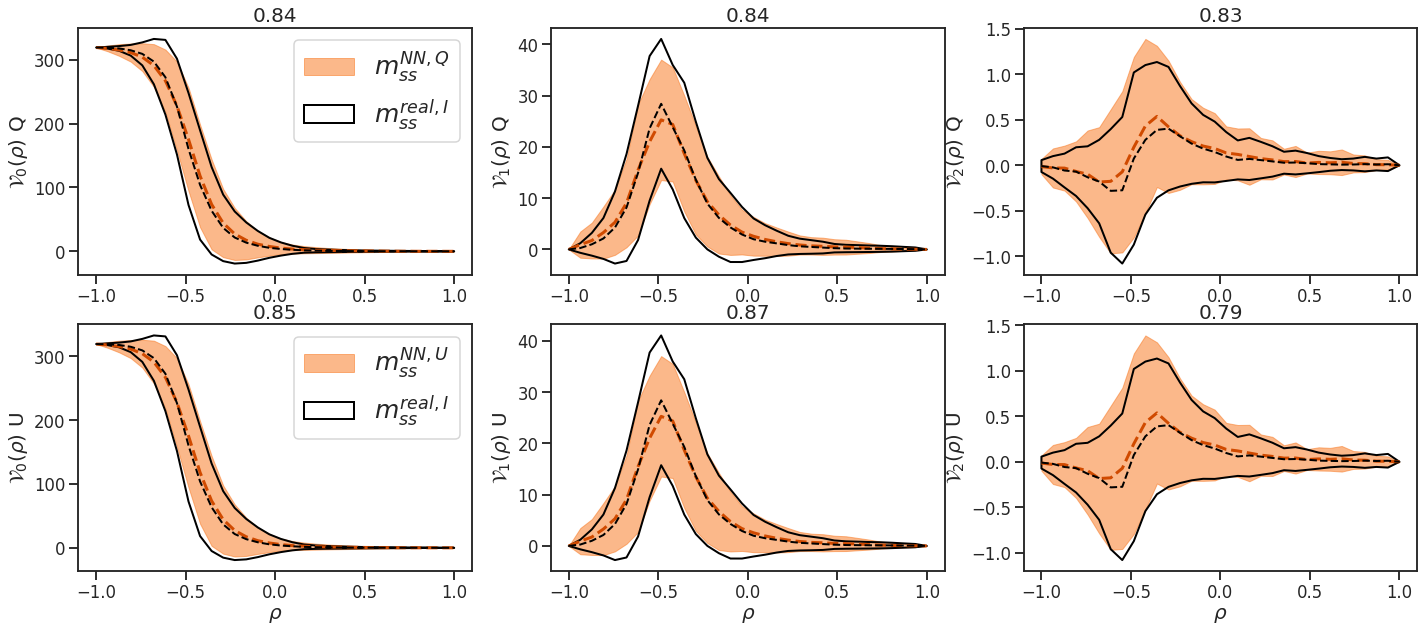

In [145]:
output.plot_MF(patch_N = 3)

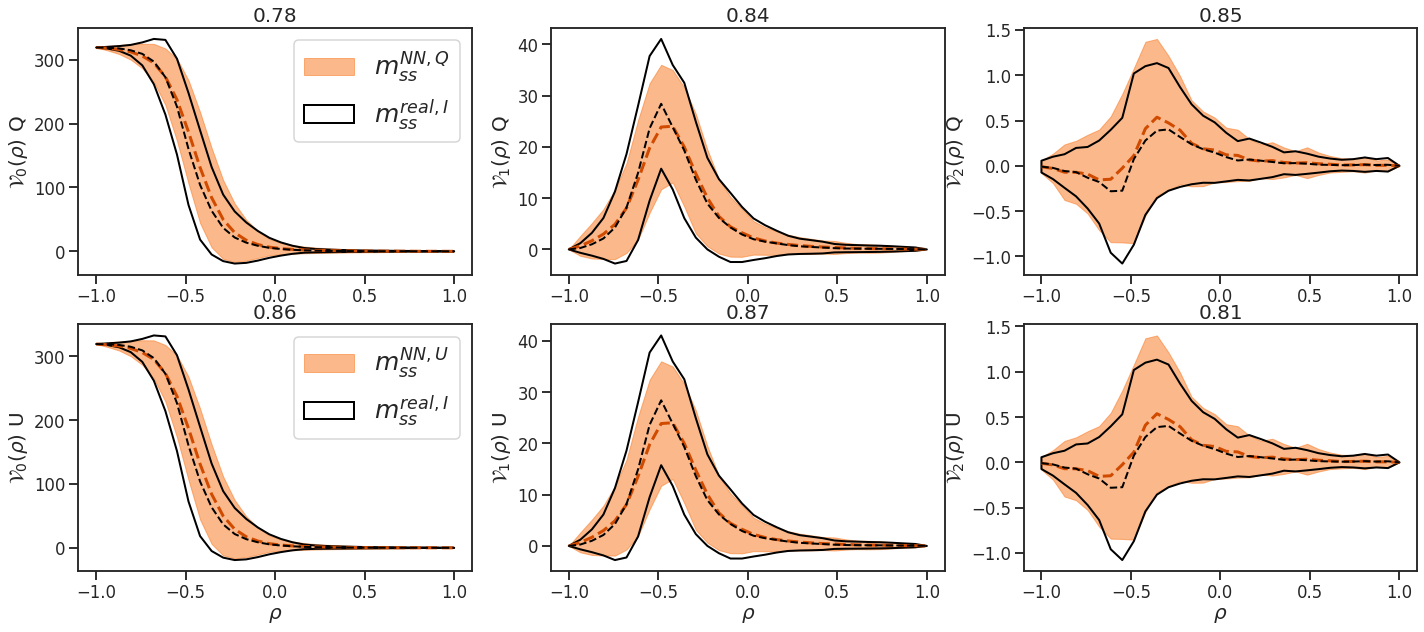

In [147]:
output.plot_MF(patch_N = 5)

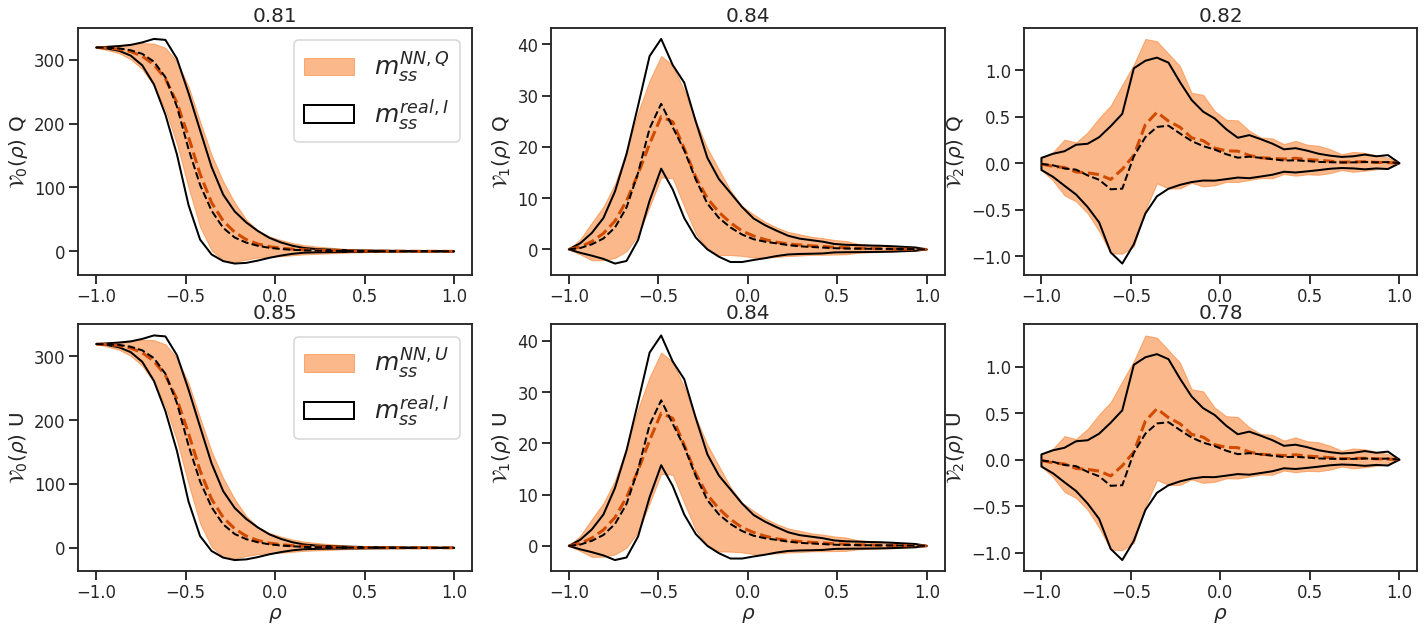

In [148]:
output.plot_MF(patch_N = 20)

In [69]:
output.combine_to_20by20(save_dir = ['/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_Q_3amin_from_20amin_physical_units_20x20_1280.npy', '/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_U_3amin_from_20amin_physical_units_20x20_1280.npy'])

In [71]:
output.NN_20by20_Q.shape

(174, 1280, 1280)

## internal visualization

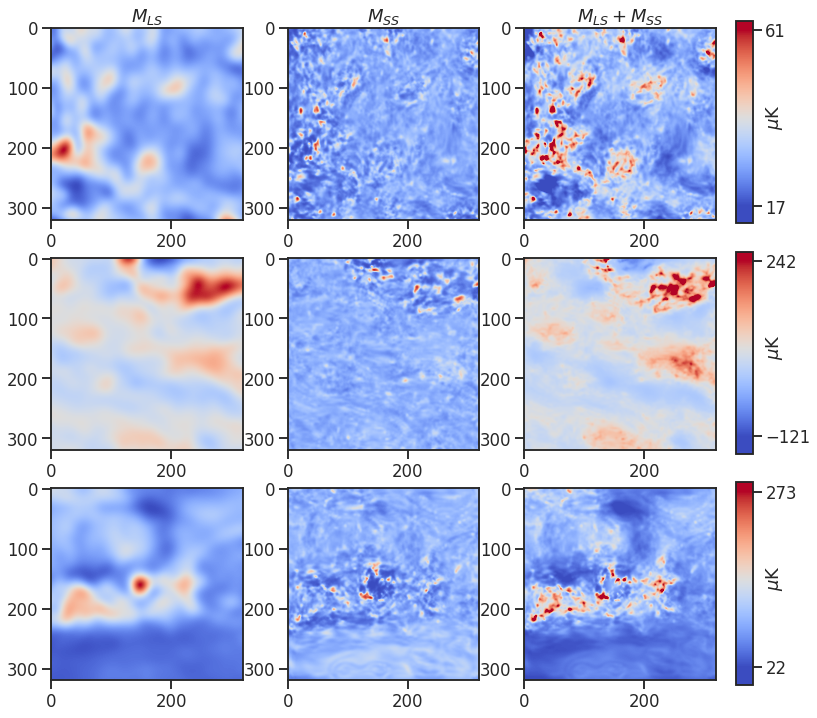

In [76]:
output.plot_maps_modify(output.Ls_Q, output.NNout_Q, output.NNmapQ_corr, m = 36, n = 4)

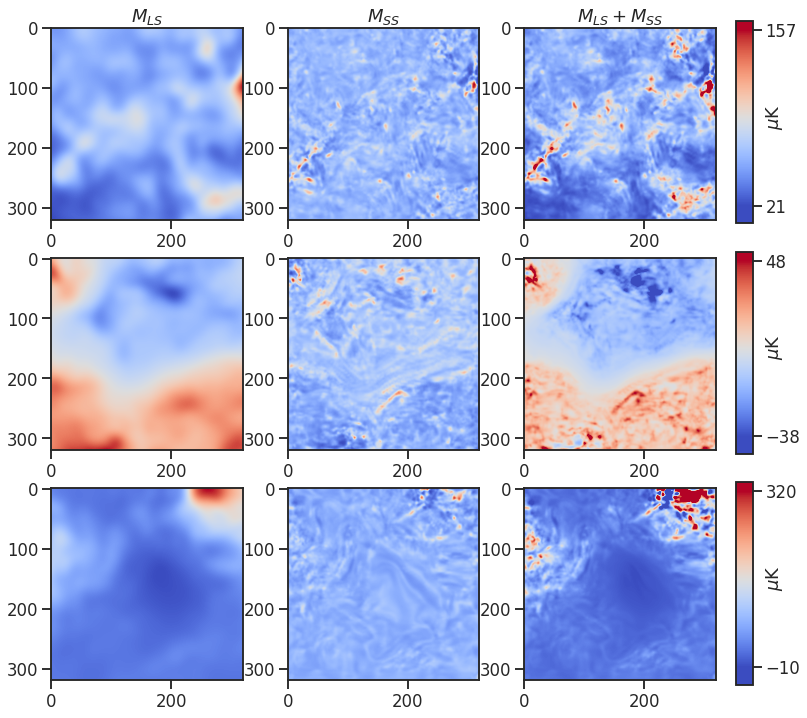

In [77]:
output.plot_maps_modify(output.Ls_U, output.NNout_U, output.NNmapU_corr, m = 36, n = 4)

## external visualization

In [7]:
maps_80amin = hp.read_map('/pscratch/sd/j/jianyao/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = None)[1:3]*1e6 
#K_CMB to uK_CMB

maps_12amin = hp.read_map('/global/cfs/cdirs/sobs/www/users/ForSE/fullsky_maps/forse_QU_thermaldust_12amin_2048_v0.fits', field = None)

save_fits = ['/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_Q_3amin_from_20amin_physical_units_full_sky.fits', '/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_U_3amin_from_20amin_physical_units_full_sky.fits']
mapQ_3amin = hp.ud_grade(hp.read_map(save_fits[0]), nside_out = 2048)
mapU_3amin = hp.ud_grade(hp.read_map(save_fits[1]), nside_out = 2048)
maps_3amin = np.array((mapQ_3amin, mapU_3amin))
del mapQ_3amin, mapU_3amin

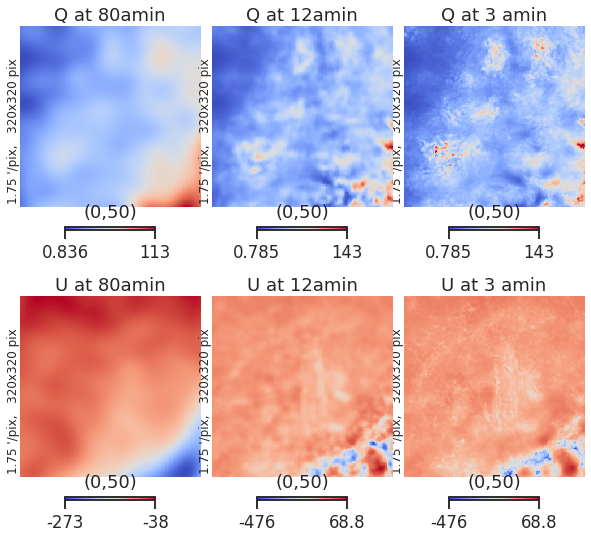

In [56]:
output.plot_external([0,50], 1.75, maps_80amin, maps_12amin, maps_3amin, unify=True, savedir = False)

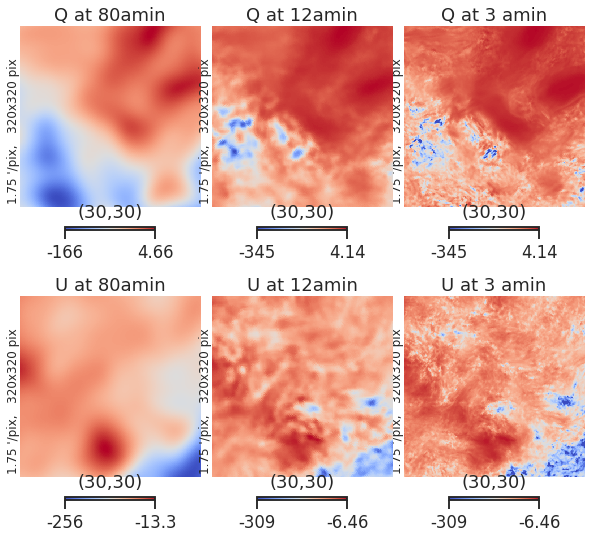

In [57]:
output.plot_external([30,30], 1.75, maps_80amin, maps_12amin, maps_3amin, unify=True, savedir = False)

# calculate the power spectra

## for a 20x20deg^2 patch

In [62]:
Gauss_Q_3amin = np.load('/pscratch/sd/j/jianyao/forse_output/gnilc_map_with_gaussian_3amin_4096_Q.npz')['patches']*1e6 # 174*1280*1280
Gauss_U_3amin = np.load('/pscratch/sd/j/jianyao/forse_output/gnilc_map_with_gaussian_3amin_4096_U.npz')['patches']*1e6

In [66]:
NN_Q_1280 = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_Q_3amin_from_20amin_physical_units_20x20_1280.npy')
NN_U_1280 = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_U_3amin_from_20amin_physical_units_20x20_1280.npy')

In [97]:
Ls_80Q = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[1, 0:174]*1e6
Ls_80U = np.load(dir_data+'GNILC_Thr12_Ulr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[1, 0:174]*1e6

In [130]:
Ls_12Q = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NNout_Q_physical_units_12amin_from_Nico_notebook_cori.npy')
Ls_12U = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NNout_U_physical_units_12amin_from_Nico_notebook_cori.npy')

In [131]:
Ls_12Q.shape

(174, 320, 320)

In [99]:
Ls_80U.shape

(174, 320, 320)

In [94]:
output.Ls_Q.shape

(174, 49, 320, 320)

In [139]:
import after_training_3amin
from importlib import reload
reload(after_training_3amin)

from after_training_3amin import post_training

output = post_training(NNout_Q, NNout_U, ss_I, Ls_Q20amin, Ls_U20amin, MF = True)

weights loaded from w22_flat_320_320.fits
weights loaded from w22_flat_1280_1280_lmax3000.fits


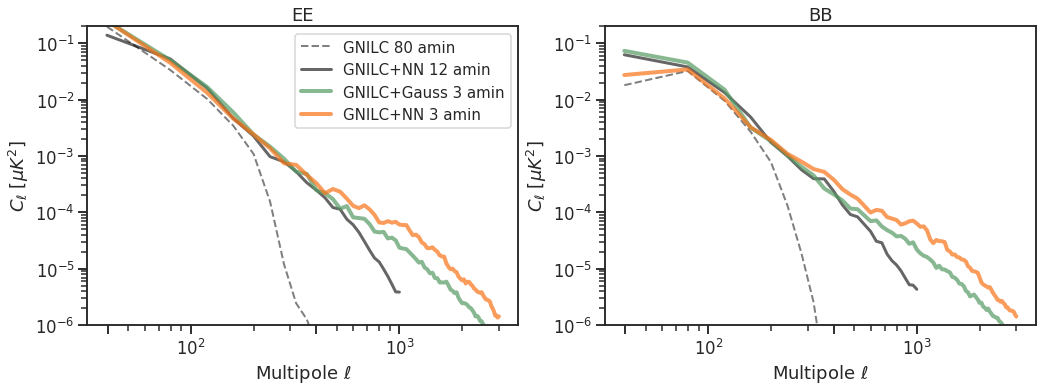

In [140]:
output.power_spectra_patch(Ls_80Q, Ls_80U,Ls_12Q, Ls_12U, Gauss_Q_3amin, Gauss_U_3amin, NN_Q_1280, NN_U_1280, N =30, lmax=3000, mask_320 = 'mask_320*320.npy', mask_1280 = 'mask_1280*1280.npy', w22_320 = "w22_flat_320_320.fits", w22_1280 = "w22_flat_1280_1280_lmax3000.fits")

weights loaded from w22_flat_320_320.fits
weights loaded from w22_flat_1280_1280_lmax3000.fits


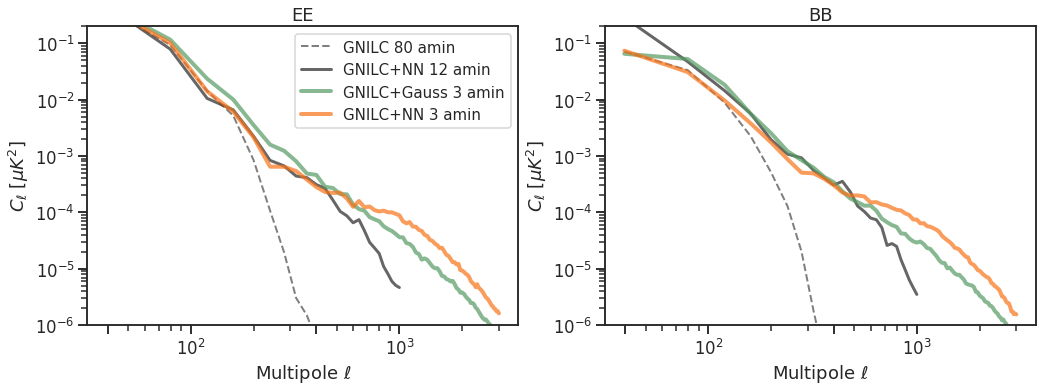

In [141]:
output.power_spectra_patch(Ls_80Q, Ls_80U,Ls_12Q, Ls_12U, Gauss_Q_3amin, Gauss_U_3amin, NN_Q_1280, NN_U_1280, N = 50, lmax=3000, mask_320 = 'mask_320*320.npy', mask_1280 = 'mask_1280*1280.npy', w22_320 = "w22_flat_320_320.fits", w22_1280 = "w22_flat_1280_1280_lmax3000.fits")

## for full-sky map

In [153]:
save_fits = ['/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_Q_3amin_from_20amin_physical_units_full_sky.fits', '/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_U_3amin_from_20amin_physical_units_full_sky.fits']
mapQ_3amin = hp.ud_grade(hp.read_map(save_fits[0]), nside_out = 2048)
mapU_3amin = hp.ud_grade(hp.read_map(save_fits[1]), nside_out = 2048)
maps_3amin = np.array((mapQ_3amin, mapU_3amin))
planck_mask = hp.read_map('/pscratch/sd/j/jianyao/HFI_Mask_GalPlane-apo2_2048_R2.00.fits', field = None)
# 20, 40, 60, 70, 80, 90, 97, and 99% sky coverage; 8 masks in total

In [154]:
maps_80amin = hp.read_map('/pscratch/sd/j/jianyao/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = None)[1:3]*1e6 
#K_CMB to uK_CMB

maps_12amin = hp.read_map('/global/cfs/cdirs/sobs/www/users/ForSE/fullsky_maps/forse_QU_thermaldust_12amin_2048_v0.fits', field = None)

In [158]:
ell_80p_80amin, cl_80p_80amin = output.cl_nmt(2048, planck_mask[4], maps_80amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_80_sky.fits')
ell_80p_12amin, cl_80p_12amin = output.cl_nmt(2048, planck_mask[4], maps_12amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_80_sky.fits')
ell_80p_3amin, cl_80p_3amin = output.cl_nmt(2048, planck_mask[4], maps_3amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_80_sky.fits')
# ell_80p_3amin, cl_80p_pd_3amin = output.cl_nmt(2048, planck_mask[4], poltens_dust_3,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_80_sky.fits')

ell_40p_80amin, cl_40p_80amin = output.cl_nmt(2048, planck_mask[1], maps_80amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')
ell_40p_12amin, cl_40p_12amin = output.cl_nmt(2048, planck_mask[1], maps_12amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')
ell_40p_3amin, cl_40p_3amin = output.cl_nmt(2048, planck_mask[1], maps_3amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')
# ell_40p_3amin, cl_40p_gauss_3amin = output.cl_nmt(2048, planck_mask[1], gaussian_maps_3amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')
# ell_40p_3amin, cl_40p_pd_3amin = output.cl_nmt(2048, planck_mask[1], poltens_dust_3,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')

weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky.fits


In [157]:
ells_full, cl_full_80amin = output.cl_anafast(maps_80amin, lmax = 3000)
ells_full, cl_full_12amin = output.cl_anafast(maps_12amin, lmax = 3000)
ells_full, cl_full_3amin = output.cl_anafast(maps_3amin, lmax = 3000)

In [170]:
np.savez('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/cl_80p_sky_maps_at_3_resolutions.npz', cl80amin = cl_80p_80amin, cl12amin = cl_80p_12amin, cl3amin = cl_80p_3amin)
np.savez('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/cl_40p_sky_maps_at_3_resolutions.npz', cl80amin = cl_40p_80amin, cl12amin = cl_40p_12amin, cl3amin = cl_40p_3amin)
np.savez('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/cl_100p_sky_maps_at_3_resolutions.npz', cl80amin = cl_full_80amin, cl12amin = cl_full_12amin, cl3amin = cl_full_3amin)

In [166]:
#transform output from hp.anafast to output from namaster
cl_full_80amin_hp = [cl_full_80amin[1], cl_full_80amin[4], cl_full_80amin[4], cl_full_80amin[2]]
cl_full_12amin_hp = [cl_full_12amin[1], cl_full_12amin[4], cl_full_12amin[4], cl_full_12amin[2]]
cl_full_3amin_hp = [cl_full_3amin[1], cl_full_3amin[4], cl_full_3amin[4], cl_full_3amin[2]]

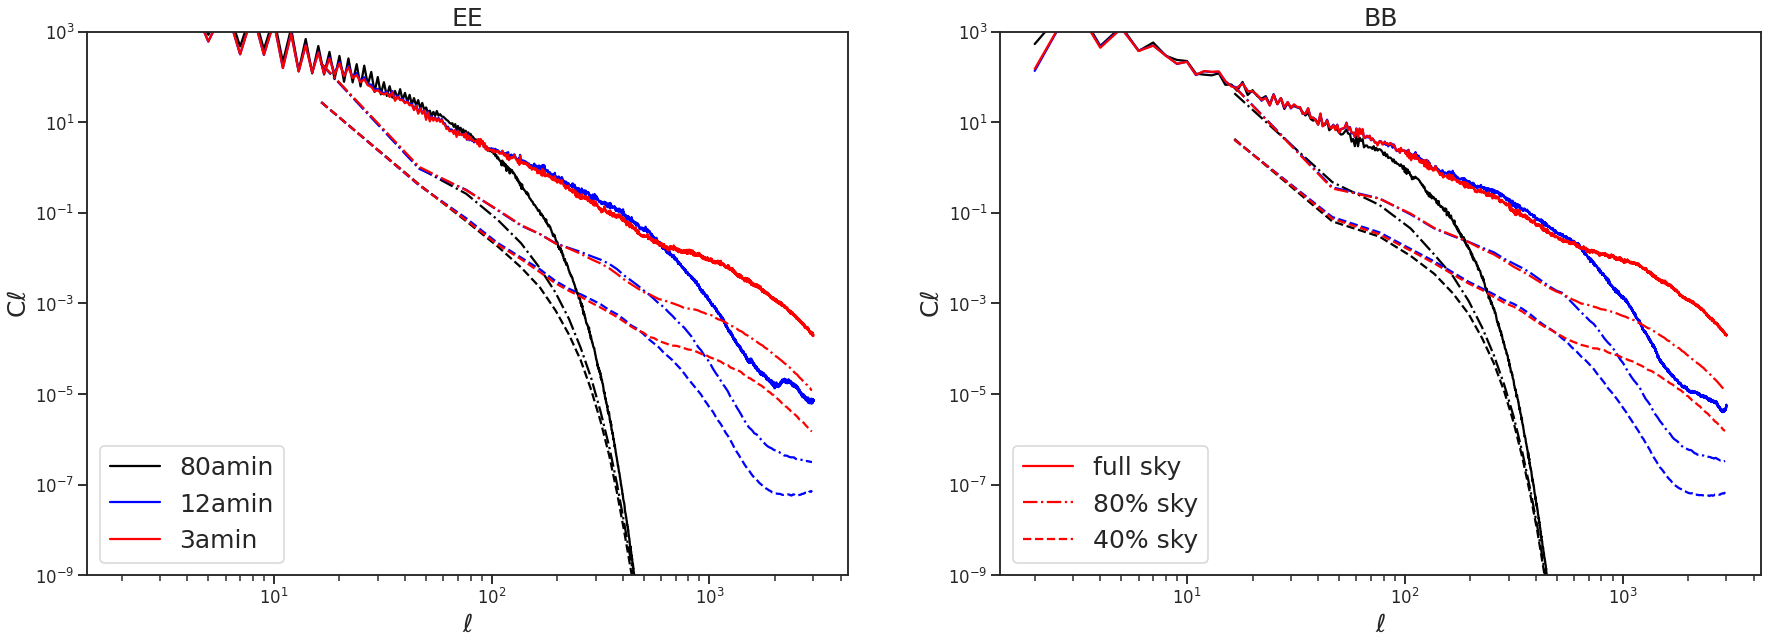

In [216]:
cls_full_80amin = {'ells':ells_full, 'spectra':cl_full_80amin_hp, 'color':'k-', 'label':'80amin'}
cls_full_12amin = {'ells':ells_full, 'spectra':cl_full_12amin_hp, 'color':'b-', 'label':'12amin'}
cls_full_3amin = {'ells':ells_full, 'spectra':cl_full_3amin_hp, 'color':'r-', 'label':'3amin'}
cls_80p_80amin = {'ells':ell_80p_80amin, 'spectra':cl_80p_80amin, 'color':'k-.', 'label':''}
cls_80p_12amin = {'ells':ell_80p_12amin, 'spectra':cl_80p_12amin, 'color':'b-.', 'label':''}
cls_80p_3amin = {'ells':ell_80p_3amin, 'spectra':cl_80p_3amin, 'color':'r-.', 'label':''}

cls_40p_80amin = {'ells':ell_40p_80amin, 'spectra':cl_40p_80amin, 'color':'k--', 'label':''}
cls_40p_12amin = {'ells':ell_40p_12amin, 'spectra':cl_40p_12amin, 'color':'b--', 'label':''}
cls_40p_3amin = {'ells':ell_40p_3amin, 'spectra':cl_40p_3amin, 'color':'r--', 'label':''}

cls_all = [cls_full_80amin, cls_full_12amin, cls_full_3amin, cls_80p_80amin, cls_80p_12amin, cls_80p_3amin, cls_40p_80amin, cls_40p_12amin, cls_40p_3amin]
output.plot_spectra(cls_all, names, save_dir = False)

In [ ]:
def zoom_plot(IQU, IQU_ss_only, IQU_iqu, IQU_iqu_ss_only, center, unify = False):
    names_IQU = ["I", "Q", "U"];
    names_iqu = ["I_i", "Q_q", "U_u"];
    
    plt.figure(figsize=(10,10))
    plt.tight_layout(pad=4)
    for i in range(3):
        
        if unify:
            
            IQU_img = hp.gnomview(IQU[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_ss_img = hp.gnomview(IQU_ss_only[i], rot=center, reso=3.75,xsize=320, no_plot=True, return_projected_map=True)

            IQU_iqu_img = hp.gnomview(IQU_iqu[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_iqu_ss_img = hp.gnomview(IQU_iqu_ss_only[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
        
            IQU_lim = [np.min((IQU_img, IQU_iqu_img)), np.max((IQU_img, IQU_iqu_img))]; 
            ss_lim = [np.min((IQU_ss_img, IQU_iqu_ss_img)), np.max((IQU_ss_img, IQU_iqu_ss_img))]
        else:
            IQU_lim = [None, None]; 
            ss_lim = [None, None]
            
        hp.gnomview(IQU[i],cmap='RdBu',  title='%s'%names_IQU[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 1 + i*4), min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_ss_only[i],cmap='RdBu',  title='%s_ss'%names_IQU[i], rot=center, reso=3.75,xsize=320, sub=(3, 4, 2 + i*4), notext=True, min = ss_lim[0], max = ss_lim[1])
        
        hp.gnomview(IQU_iqu[i],cmap='RdBu',  title='%s'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 3 + i*4), notext=True, min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_iqu_ss_only[i],cmap='RdBu',  title='%s_ss'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 4 + i*4), notext=True, min = ss_lim[0], max = ss_lim[1])
    
    plt.savefig('figures/map_patch1.svg', format = 'svg')